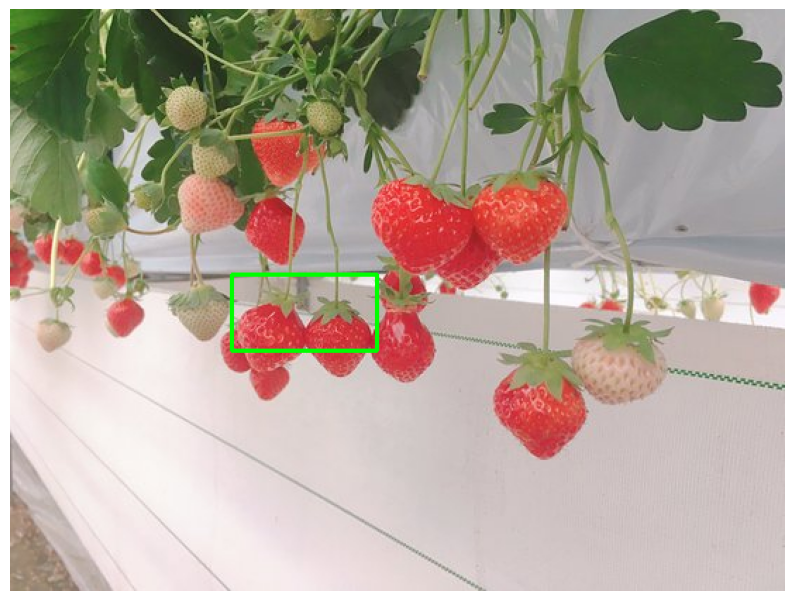

In [1]:
import cv2
import matplotlib.pyplot as plt

# Carregue a imagem
image_path = 'morango_teste.png'
image = cv2.imread(image_path)

# Converter BGR em RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dadas caixas delimitadoras para morangos maduros (como xmin, ymin, xmax, ymax)
bboxes = [[0.47274077,0.58707494,0.2854583,0.4557554],[0.38386354,0.46189192,0.50421846,0.6341344],[0.2949206,0.38118654,0.50342536,0.627008],[0.624461,0.73610157,0.60127795,0.7708696],[0.12869212,0.17150074,0.49227244,0.56483084],[0.6031045,0.7159714,0.28323108,0.43136933],[0.46856856,0.545293,0.5065991,0.64129704],[0.30468142,0.37814146,0.3283289,0.43520877],[0.9547271,0.9923496,0.46592316,0.51875466],[0.27579346,0.30686563,0.54058605,0.6192457],[0.32066557,0.3903836,0.19143853,0.29733202],[7.48069E-4,0.025696214,0.36952698,0.4785216],[0.12622298,0.14776722,0.43715495,0.48533863],[0.52638286,0.6597346,0.2883039,0.44680235],[0.4790356,0.5451013,0.45290494,0.5188672],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]]


# Confianças
confidences = [0.9999981,0.999998,0.99999774,0.99999297,0.99995637,0.9998254,0.9902261,0.9862468,0.9583585,0.94673085,0.93730795,0.8034101,0.45379248,0.4157195,0.2566627,0.1969814,0.18792166,0.1634719,0.13981718,0.08794997,0.086782254,0.074115485,0.06888329,0.068101704,0.058263738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

# Certifique-se de que o número de caixas corresponda ao número de confidências
assert len(bboxes) == len(confidences)

# Filtrar caixas delimitadoras com base em um limite de confiança
confidence_threshold = 0.999998  # Defina um limite de confiança
filtered_boxes = [box for box, conf in zip(bboxes, confidences) if conf > confidence_threshold]

# Função para desenhar caixas delimitadoras na imagem
def draw_boxes(image, boxes):
    h, w, _ = image.shape  # Obtenha as dimensões da imagem
    for box in boxes:
        # Converter de coordenadas relativas em absolutas
        xmin, ymin, xmax, ymax = box
        pt1 = (int(xmin * w), int(ymin * h))
        pt2 = (int(xmax * w), int(ymax * h))

        # Desenhe o retângulo
        image = cv2.rectangle(image, pt1, pt2, (0, 255, 0), 2)
    return image

# Desenhe as caixas delimitadoras na imagem
boxed_image = draw_boxes(image, filtered_boxes)

# Exibir a imagem com caixas delimitadoras
plt.figure(figsize=(10,10))
plt.imshow(boxed_image)
plt.axis('off') # Ocultar o eixo
plt.show()